[Source](https://towardsdatascience.com/model-design-and-selection-with-scikit-learn-18a29041d02a)

In [1]:
###############################################################################
#                          1. Importing Libraries                             #
###############################################################################
# For reading, visualizing, and preprocessing data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Classifiers
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

In [2]:
###############################################################################
#                                 2. Get data                                 #
###############################################################################
X, y = make_classification(n_samples = 1000, n_features = 30, n_informative = 5,
                           n_redundant = 15, n_repeated = 5, 
                           n_clusters_per_class = 2, class_sep = 0.5,
                           random_state = 1000, shuffle = False)

# Numpy array to pandas dataframe
labels = [f"Feature {ii+1}" for ii in range(X.shape[1])]
X = pd.DataFrame(X, columns = labels)
y = pd.DataFrame(y, columns = ["Target"])

In [3]:
###############################################################################
#                        3. Create train and test set                         #
###############################################################################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                    random_state = 1000)

In [4]:
###############################################################################
#                               4. Classifiers                                #
###############################################################################
# Create list of tuples with classifier label and classifier object
classifiers = {}
classifiers.update({"LDA": LinearDiscriminantAnalysis()})
classifiers.update({"QDA": QuadraticDiscriminantAnalysis()})
classifiers.update({"AdaBoost": AdaBoostClassifier()})
classifiers.update({"Bagging": BaggingClassifier()})
classifiers.update({"Extra Trees Ensemble": ExtraTreesClassifier()})
classifiers.update({"Gradient Boosting": GradientBoostingClassifier()})
classifiers.update({"Random Forest": RandomForestClassifier()})
classifiers.update({"Ridge": RidgeClassifier()})
classifiers.update({"SGD": SGDClassifier()})
classifiers.update({"BNB": BernoulliNB()})
classifiers.update({"GNB": GaussianNB()})
classifiers.update({"KNN": KNeighborsClassifier()})
classifiers.update({"MLP": MLPClassifier()})
classifiers.update({"LSVC": LinearSVC()})
classifiers.update({"NuSVC": NuSVC()})
classifiers.update({"SVC": SVC()})
classifiers.update({"DTC": DecisionTreeClassifier()})
classifiers.update({"ETC": ExtraTreeClassifier()})

# Create dict of decision function labels
DECISION_FUNCTIONS = {"Ridge", "SGD", "LSVC", "NuSVC", "SVC"}

# Create dict for classifiers with feature_importances_ attribute
FEATURE_IMPORTANCE = {"Gradient Boosting", "Extra Trees Ensemble", "Random Forest"}

## Hyper-parameter Optimization using Grid Search and Random Search
![](https://miro.medium.com/max/1000/1*9W1MrRkHi0YFmBoHi9Y2Ow.png)
![](https://miro.medium.com/max/1400/0*yDmmJmvRowl0cSN8.png)

In [5]:
###############################################################################
#                             5. Hyper-parameters                             #
###############################################################################
# Initiate parameter grid
parameters = {}

# Update dict with LDA
parameters.update(
    {
        "LDA": {
            "classifier__solver": ["svd"],
        }
    }
)

# Update dict with QDA
parameters.update(
    {
        "QDA": {
            "classifier__reg_param": [0.01 * ii for ii in range(0, 101)],
        }
    }
)
# Update dict with AdaBoost
parameters.update(
    {
        "AdaBoost": {
            "classifier__base_estimator": [DecisionTreeClassifier(max_depth=ii) for ii in range(1, 6)],
            "classifier__n_estimators": [200],
            "classifier__learning_rate": [0.001, 0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 1.0],
        }
    }
)

# Update dict with Bagging
parameters.update(
    {
        "Bagging": {
            "classifier__base_estimator": [DecisionTreeClassifier(max_depth=ii) for ii in range(1, 6)],
            "classifier__n_estimators": [200],
            "classifier__max_features": [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
            "classifier__n_jobs": [-1],
        }
    }
)

# Update dict with Gradient Boosting
parameters.update(
    {
        "Gradient Boosting": {
            "classifier__learning_rate": [0.15, 0.1, 0.05, 0.01, 0.005, 0.001],
            "classifier__n_estimators": [200],
            "classifier__max_depth": [2, 3, 4, 5, 6],
            "classifier__min_samples_split": [0.005, 0.01, 0.05, 0.10],
            "classifier__min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
            "classifier__max_features": ["auto", "sqrt", "log2"],
            "classifier__subsample": [0.8, 0.9, 1],
        }
    }
)


# Update dict with Extra Trees
parameters.update(
    {
        "Extra Trees Ensemble": {
            "classifier__n_estimators": [200],
            "classifier__class_weight": [None, "balanced"],
            "classifier__max_features": ["auto", "sqrt", "log2"],
            "classifier__max_depth": [3, 4, 5, 6, 7, 8],
            "classifier__min_samples_split": [0.005, 0.01, 0.05, 0.10],
            "classifier__min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
            "classifier__criterion": ["gini", "entropy"],
            "classifier__n_jobs": [-1],
        }
    }
)


# Update dict with Random Forest Parameters
parameters.update(
    {
        "Random Forest": {
            "classifier__n_estimators": [200],
            "classifier__class_weight": [None, "balanced"],
            "classifier__max_features": ["auto", "sqrt", "log2"],
            "classifier__max_depth": [3, 4, 5, 6, 7, 8],
            "classifier__min_samples_split": [0.005, 0.01, 0.05, 0.10],
            "classifier__min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
            "classifier__criterion": ["gini", "entropy"],
            "classifier__n_jobs": [-1],
        }
    }
)

# Update dict with Ridge
parameters.update({"Ridge": {"classifier__alpha": [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.50, 0.75, 1.0]}})

# Update dict with SGD Classifier
parameters.update(
    {
        "SGD": {
            "classifier__alpha": [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.50, 0.75, 1.0],
            "classifier__penalty": ["l1", "l2"],
            "classifier__n_jobs": [-1],
        }
    }
)


# Update dict with BernoulliNB Classifier
parameters.update({"BNB": {"classifier__alpha": [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.50, 0.75, 1.0]}})

# Update dict with GaussianNB Classifier
parameters.update({"GNB": {"classifier__var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}})

# Update dict with K Nearest Neighbors Classifier
parameters.update(
    {
        "KNN": {
            "classifier__n_neighbors": list(range(1, 31)),
            "classifier__p": [1, 2, 3, 4, 5],
            "classifier__leaf_size": [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
            "classifier__n_jobs": [-1],
        }
    }
)

# Update dict with MLPClassifier
parameters.update(
    {
        "MLP": {
            "classifier__hidden_layer_sizes": [(5), (10), (5, 5), (10, 10), (5, 5, 5), (10, 10, 10)],
            "classifier__activation": ["identity", "logistic", "tanh", "relu"],
            "classifier__learning_rate": ["constant", "invscaling", "adaptive"],
            "classifier__max_iter": [100, 200, 300, 500, 1000, 2000],
            "classifier__alpha": list(10.0 ** -np.arange(1, 10)),
        }
    }
)

parameters.update({"LSVC": {"classifier__penalty": ["l2"], "classifier__C": [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100]}})

parameters.update(
    {
        "NuSVC": {
            "classifier__nu": [0.25, 0.50, 0.75],
            "classifier__kernel": ["linear", "rbf", "poly"],
            "classifier__degree": [1, 2, 3, 4, 5, 6],
        }
    }
)

parameters.update(
    {
        "SVC": {
            "classifier__kernel": ["linear", "rbf", "poly"],
            "classifier__gamma": ["auto"],
            "classifier__C": [0.1, 0.5, 1, 5, 10, 50, 100],
            "classifier__degree": [1, 2, 3, 4, 5, 6],
        }
    }
)


# Update dict with Decision Tree Classifier
parameters.update(
    {
        "DTC": {
            "classifier__criterion": ["gini", "entropy"],
            "classifier__splitter": ["best", "random"],
            "classifier__class_weight": [None, "balanced"],
            "classifier__max_features": ["auto", "sqrt", "log2"],
            "classifier__max_depth": [1, 2, 3, 4, 5, 6, 7, 8],
            "classifier__min_samples_split": [0.005, 0.01, 0.05, 0.10],
            "classifier__min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
        }
    }
)

# Update dict with Extra Tree Classifier
parameters.update(
    {
        "ETC": {
            "classifier__criterion": ["gini", "entropy"],
            "classifier__splitter": ["best", "random"],
            "classifier__class_weight": [None, "balanced"],
            "classifier__max_features": ["auto", "sqrt", "log2"],
            "classifier__max_depth": [1, 2, 3, 4, 5, 6, 7, 8],
            "classifier__min_samples_split": [0.005, 0.01, 0.05, 0.10],
            "classifier__min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
        }
    }
)


def grid_sampler(param_grid, sampled_features=2, max_feature_samples=2):
    feature_names = list(param_grid)
    upsampled_feature_names = np.random.choice(feature_names, min(sampled_features, len(feature_names)), replace=False)
    new_param_grid = {key: max_feature_samples if key in upsampled_feature_names else 1 for key in feature_names}
    new_param_grid = {
        key: np.random.choice(param_grid[key], min(value, len(param_grid[key])), replace=False)
        for key, value in new_param_grid.items()
    }

    return new_param_grid


/tmp/ipykernel_93411/3025112955.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))


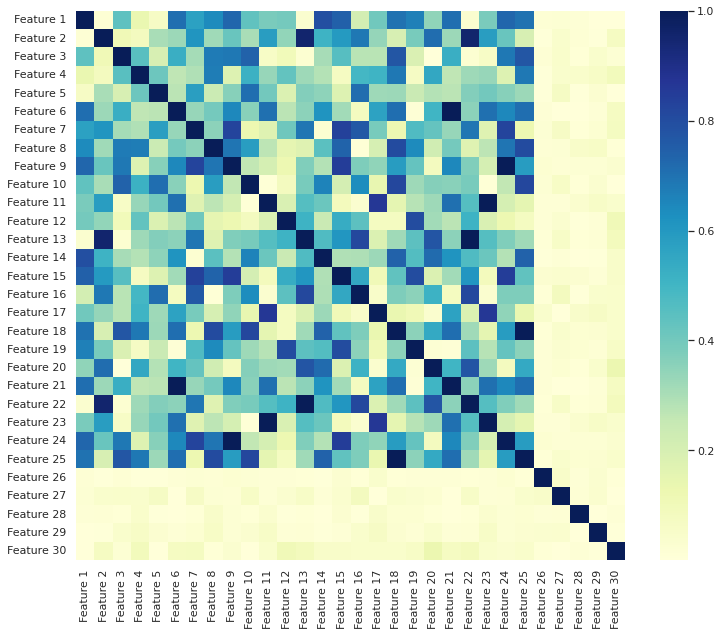

In [6]:
###############################################################################
#              6. Feature Selection: Removing highly correlated features      #
###############################################################################
# Filter Method: Spearman's Cross Correlation > 0.95
# Make correlation matrix
corr_matrix = X_train.corr(method = "spearman").abs()

# Draw the heatmap
sns.set(font_scale = 1.0)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr_matrix, cmap= "YlGnBu", square=True, ax = ax)
f.tight_layout()
plt.savefig("correlation_matrix.png", dpi = 1080)

# Select upper triangle of matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features
X_train = X_train.drop(to_drop, axis = 1)
X_test = X_test.drop(to_drop, axis = 1)

In [7]:
###############################################################################
#                                Base Estimators                              #
###############################################################################
# Create dict for classifiers with feature_importances_ attribute
FEATURE_IMPORTANCE = {"Gradient Boosting", "Extra Trees Ensemble", "Random Forest"}

## Recursive Feature Elimination
This is achieved by fitting the given machine learning algorithm used in the core of the model, ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains.
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_rfe_with_cross_validation_001.png)

In [24]:
###############################################################################
#                     7. Tuning a classifier to use with RFECV                #
###############################################################################
# Define classifier to use as the base of the recursive feature elimination algorithm
selected_classifier = "Random Forest"
classifier = classifiers[selected_classifier]

# Tune classifier (Took = 4.8 minutes)

# Scale features via Z-score normalization
scaler = StandardScaler()

# Define steps in pipeline
steps = [("scaler", scaler), ("classifier", classifier)]

# Initialize Pipeline object
pipeline = Pipeline(steps=steps)

# Define parameter grid
param_grid = parameters[selected_classifier]
np.random.seed = 314
param_grid = grid_sampler(param_grid)

# Initialize GridSearch object
gscv = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1, scoring="f1_weighted")

# Fit gscv
print(f"Now tuning {selected_classifier}.")
gscv.fit(X_train, np.ravel(y_train))

# Get best parameters and score
best_params = gscv.best_params_
best_score = gscv.best_score_

# Update classifier parameters
tuned_params = {item[12:]: best_params[item] for item in best_params}
classifier.set_params(**tuned_params)


Now tuning Random Forest.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


RandomForestClassifier(class_weight='balanced', max_depth=3,
                       max_features='log2', min_samples_leaf=0.05,
                       min_samples_split=0.005, n_estimators=200, n_jobs=-1)

In [23]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [25]:
###############################################################################
#                  8. Custom pipeline object to use with RFECV                #
###############################################################################
# Select Features using RFECV
class PipelineRFE(Pipeline):
    # Source: https://ramhiser.com/post/2018-03-25-feature-selection-with-scikit-learn-pipeline/
    def fit(self, X, y=None, **fit_params):
        super(PipelineRFE, self).fit(X, y, **fit_params)
        self.feature_importances_ = self.steps[-1][-1].feature_importances_
        return self

In [ ]:
###############################################################################
#   9. Feature Selection: Recursive Feature Selection with Cross Validation   #
###############################################################################
# Define pipeline for RFECV
steps = [("scaler", scaler), ("classifier", classifier)]
pipe = PipelineRFE(steps = steps)

# Initialize RFECV object
feature_selector = RFECV(pipe, cv = 5, step = 1, scoring = "f1_weighted", verbose = 1)

# Fit RFECV
feature_selector.fit(X_train, np.ravel(y_train))

# Get selected features
feature_names = X_train.columns
selected_features = feature_names[feature_selector.support_].tolist()

In [73]:
feature_selector.support_

array([ True, False,  True,  True, False,  True, False,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True])

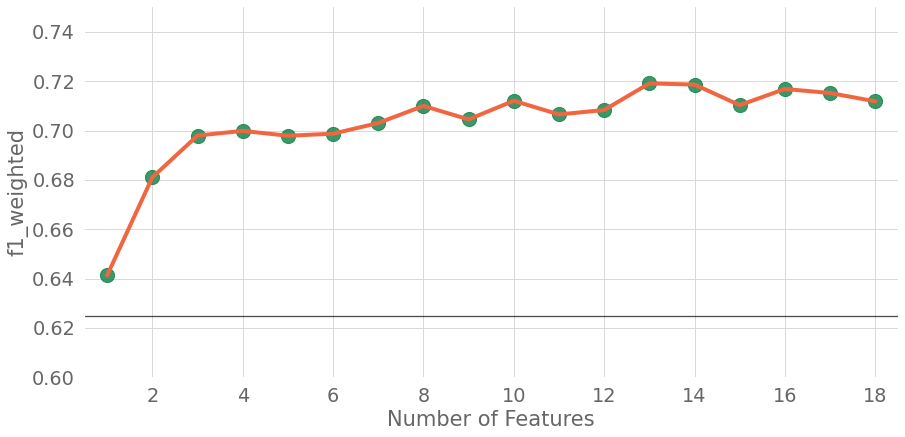

In [35]:
###############################################################################
#                             10. Performance Curve                           #
###############################################################################
# Get Performance Data
performance_curve = {"Number of Features": list(range(1, len(feature_names) + 1)),
                    "f1_weighted": feature_selector.cv_results_['mean_test_score']}
performance_curve = pd.DataFrame(performance_curve)

# Performance vs Number of Features
# Set graph style
sns.set(font_scale = 1.75)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})
colors = sns.color_palette("RdYlGn", 20)
line_color = colors[3]
marker_colors = colors[-1]

# Plot
f, ax = plt.subplots(figsize=(13, 6.5))
sns.lineplot(x = "Number of Features", y = "f1_weighted", data = performance_curve,
             color = line_color, lw = 4, ax = ax)
sns.regplot(x = performance_curve["Number of Features"], y = performance_curve["f1_weighted"],
            color = marker_colors, fit_reg = False, scatter_kws = {"s": 200}, ax = ax)

# Axes limits
plt.xlim(0.5, len(feature_names)+0.5)
plt.ylim(0.60, 0.75)

# Generate a bolded horizontal line at y = 0
ax.axhline(y = 0.625, color = 'black', linewidth = 1.3, alpha = .7)

# Turn frame off
ax.set_frame_on(False)

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("performance_curve.png", dpi = 1080)

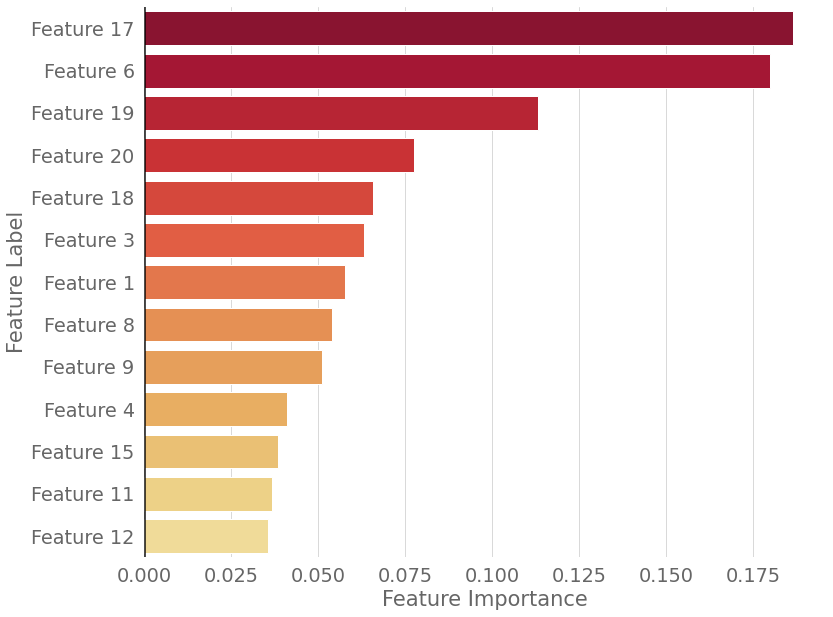

In [34]:
###############################################################################
#                  12. Visualizing Selected Features Importance               #
###############################################################################
# Get selected features data set
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# Train classifier
classifier.fit(X_train, np.ravel(y_train))

# Get feature importance
feature_importance = pd.DataFrame(selected_features, columns = ["Feature Label"])
feature_importance["Feature Importance"] = classifier.feature_importances_

# Sort by feature importance
feature_importance = feature_importance.sort_values(by="Feature Importance", ascending=False)

# Set graph style
sns.set(font_scale = 1.75)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Set figure size and create barplot
f, ax = plt.subplots(figsize=(12, 9))
sns.barplot(x = "Feature Importance", y = "Feature Label",
            palette = reversed(sns.color_palette('YlOrRd', 15)),  data = feature_importance)

# Generate a bolded horizontal line at y = 0
ax.axvline(x = 0, color = 'black', linewidth = 4, alpha = .7)

# Turn frame off
ax.set_frame_on(False)

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("feature_importance.png", dpi = 1080)

In [ ]:
###############################################################################
#                       13. Classifier Tuning and Evaluation                  #
###############################################################################
# Initialize dictionary to store results
results = {}

# Tune and evaluate classifiers
for classifier_label, classifier in classifiers.items():
    # Print message to user
    print(f"Now tuning {classifier_label}.")
    
    # Scale features via Z-score normalization
    scaler = StandardScaler()
    
    # Define steps in pipeline
    steps = [("scaler", scaler), ("classifier", classifier)]
    
    # Initialize Pipeline object
    pipeline = Pipeline(steps = steps)
      
    # Define parameter grid
    param_grid = parameters[classifier_label]
    np.random.seed = 314
    param_grid = grid_sampler(param_grid)
    
    # Initialize GridSearch object
    gscv = GridSearchCV(pipeline, param_grid, cv = 5,  n_jobs= -1, verbose = 1, scoring = "f1_weighted")
                      
    # Fit gscv
    gscv.fit(X_train, np.ravel(y_train))  
    
    # Get best parameters and score
    best_params = gscv.best_params_
    best_score = gscv.best_score_
    
    # Update classifier parameters and define new pipeline with tuned classifier
    tuned_params = {item[12:]: best_params[item] for item in best_params}
    classifier.set_params(**tuned_params)
            
    # Make predictions
    if classifier_label in DECISION_FUNCTIONS:
        y_pred = gscv.decision_function(X_test)
    else:
        y_pred = gscv.predict_proba(X_test)[:,1]
    
    # Evaluate model
    f1_weighted = metrics.f1_score(y_test["Target"], (y_pred > 0.5).astype(int), average="weighted")
    
    # Save results
    result = {"Classifier": gscv,
              "Best Parameters": best_params,
              "Training f1_weighted": best_score,
              "Test f1_weighted": f1_weighted}
    
    results.update({classifier_label: result})

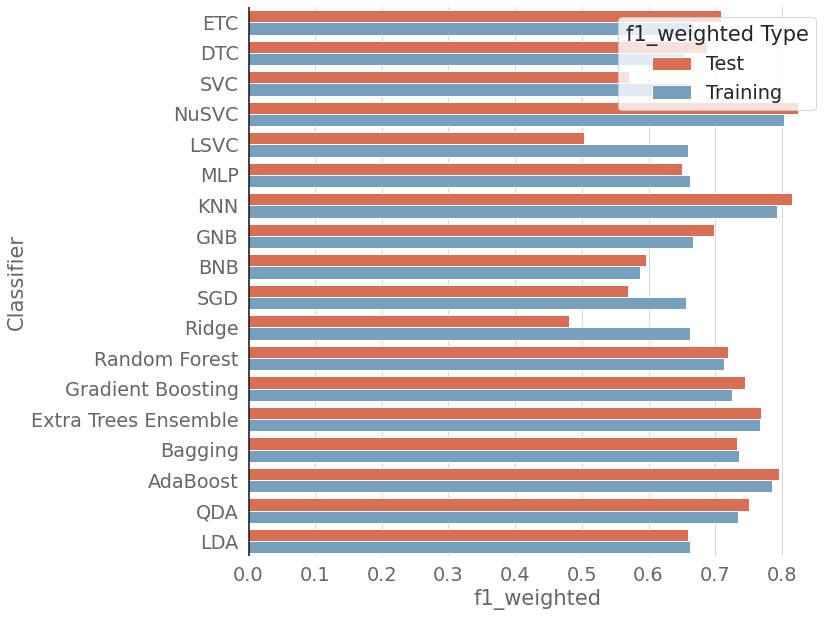

In [68]:
###############################################################################
#                              14. Visualing Results                          #
###############################################################################
# Initialize f1_weighted_score dictionary
f1_weighted_scores = {
              "Classifier": [],
              "f1_weighted": [],
              "f1_weighted Type": []
              }

# Get f1_weighted scores into dictionary
for classifier_label in results:
    f1_weighted_scores.update({"Classifier": [classifier_label] + f1_weighted_scores["Classifier"],
                       "f1_weighted": [results[classifier_label]["Training f1_weighted"]] + f1_weighted_scores["f1_weighted"],
                       "f1_weighted Type": ["Training"] + f1_weighted_scores["f1_weighted Type"]})
    
    f1_weighted_scores.update({"Classifier": [classifier_label] + f1_weighted_scores["Classifier"],
                       "f1_weighted": [results[classifier_label]["Test f1_weighted"]] + f1_weighted_scores["f1_weighted"],
                       "f1_weighted Type": ["Test"] + f1_weighted_scores["f1_weighted Type"]})

# Dictionary to PandasDataFrame
f1_weighted_scores = pd.DataFrame(f1_weighted_scores)

# Set graph style
sns.set(font_scale = 1.75)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

    
# Colors
training_color = sns.color_palette("RdYlBu", 10)[1]
test_color = sns.color_palette("RdYlBu", 10)[-2]
colors = [training_color, test_color]

# Set figure size and create barplot
f, ax = plt.subplots(figsize=(12, 9))

sns.barplot(x="f1_weighted", y="Classifier", hue="f1_weighted Type", palette = colors,
            data=f1_weighted_scores)

# Generate a bolded horizontal line at y = 0
ax.axvline(x = 0, color = 'black', linewidth = 4, alpha = .7)

# Turn frame off
ax.set_frame_on(False)

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("f1_weighted Scores.png", dpi = 1080)